In [ ]:
## ✅ FINANCIAL FRAUD DETECTION SYSTEM

# Tools: Python (EDA + Isolation Forest), CSV Output for Power BI

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import os

In [3]:
# STEP 1: LOAD DATA 
def load_data():
    file_path = os.path.join("data", "creditcard.csv")
    df = pd.read_csv(file_path)
    return df

In [4]:
# STEP 2: EDA 
def perform_eda(df):
    print("\n Checking for missing/duplicate values:")
    print(df.isnull().sum())
    print("\nDuplicate Rows:", df.duplicated().sum())

In [12]:
df = pd.read_csv('C:/Users/HP/Downloads/financial-fraud-detection/creditcard.csv')
print("\n Class distribution:")
print(df['Class'].value_counts())


 Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


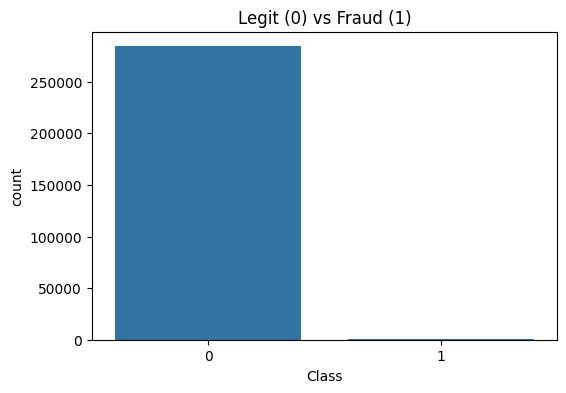

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Legit (0) vs Fraud (1)")
plt.show()

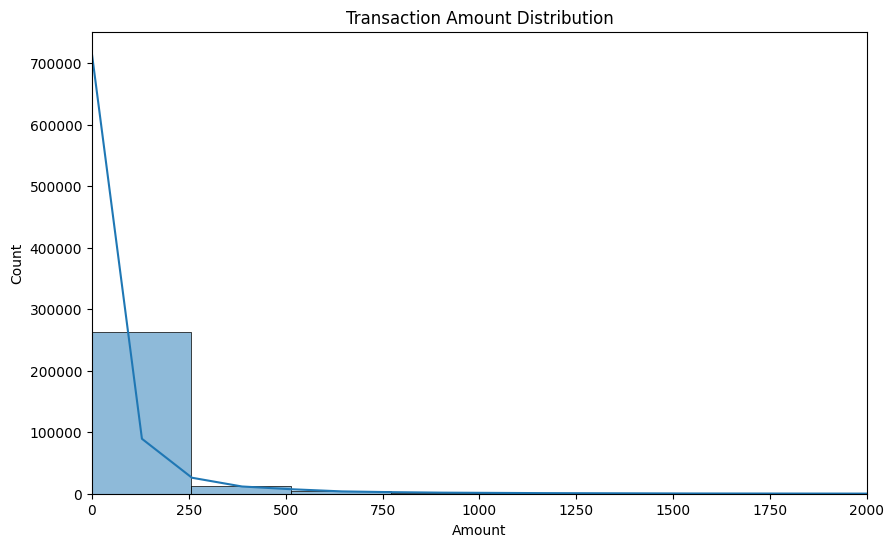

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlim(0, 2000)
plt.show()


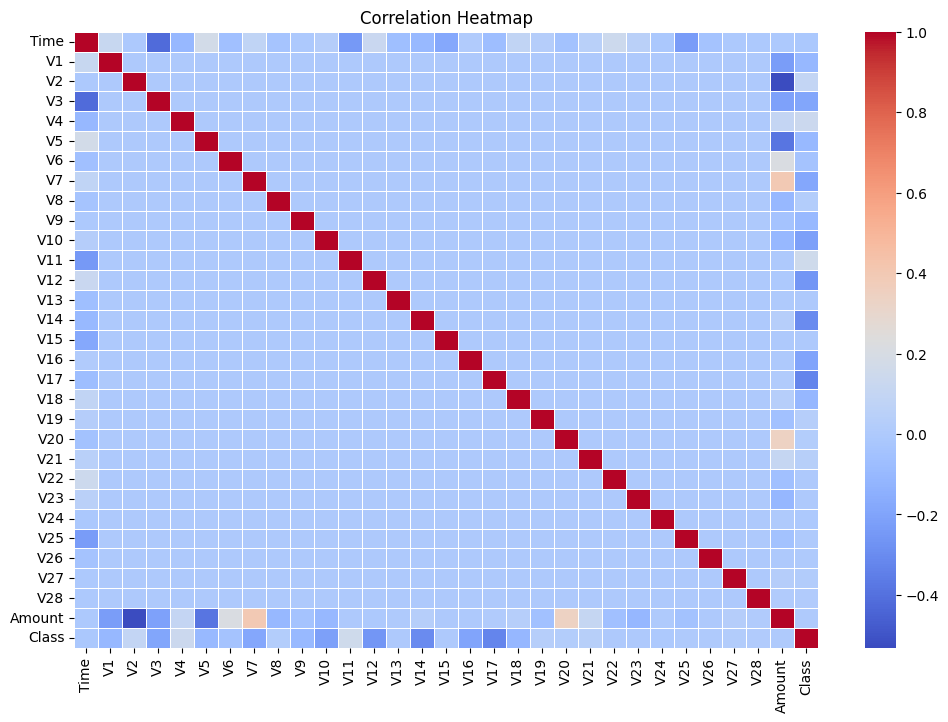

In [17]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

DataFrame loaded successfully!


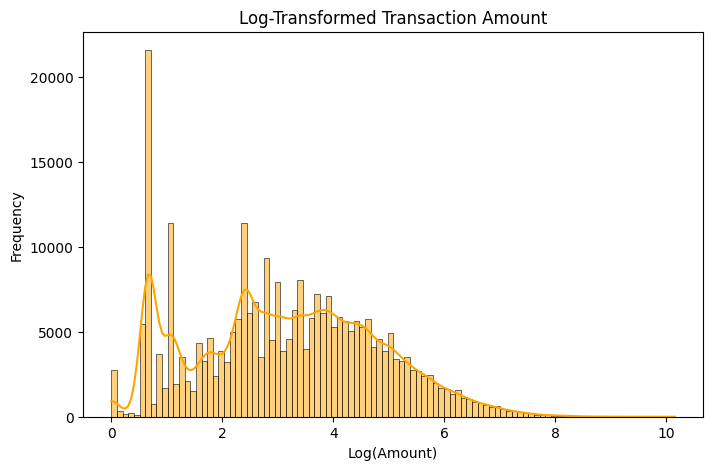

In [43]:
def plot_log_amount_distribution(df):
    df['log_amount'] = np.log1p(df['Amount'])

    plt.figure(figsize=(8,5))
    sns.histplot(df['log_amount'], bins=100, kde=True, color='orange')
    plt.title("Log-Transformed Transaction Amount")
    plt.xlabel("Log(Amount)")
    plt.ylabel("Frequency")
    plt.show() 
try:
    df_creditcard = pd.read_csv(r'C:\Users\HP\Downloads\financial-fraud-detection\creditcard.csv')
    print("DataFrame loaded successfully!")

   
    plot_log_amount_distribution(df_creditcard)

except FileNotFoundError:
    print("Error: 'creditcard.csv' not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

DataFrame loaded successfully!


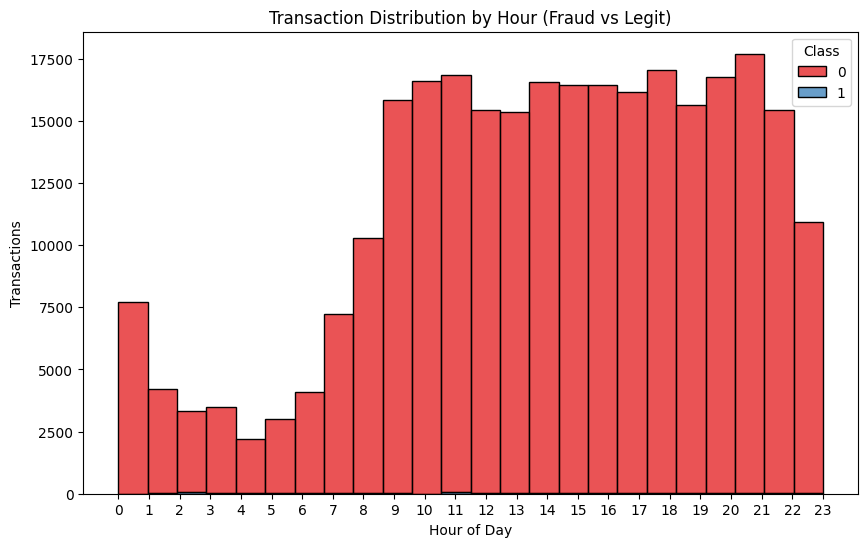

In [42]:

def plot_fraud_by_hour(df):
   
    df['hour'] = (df['Time'] // 3600) % 24

    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x='hour', hue='Class', multiple='stack', palette='Set1', bins=24)
    plt.title("Transaction Distribution by Hour (Fraud vs Legit)")
    plt.xlabel("Hour of Day")
    plt.ylabel("Transactions")
    plt.xticks(range(0, 24)) # Ensure all hours are displayed as ticks for clarity
    plt.show()

try:
    df_creditcard = pd.read_csv(r'C:\Users\HP\Downloads\financial-fraud-detection\creditcard.csv')
    print("DataFrame loaded successfully!")

  
    plot_fraud_by_hour(df_creditcard)

except FileNotFoundError:
    print("Error: 'creditcard.csv' not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

DataFrame loaded successfully!


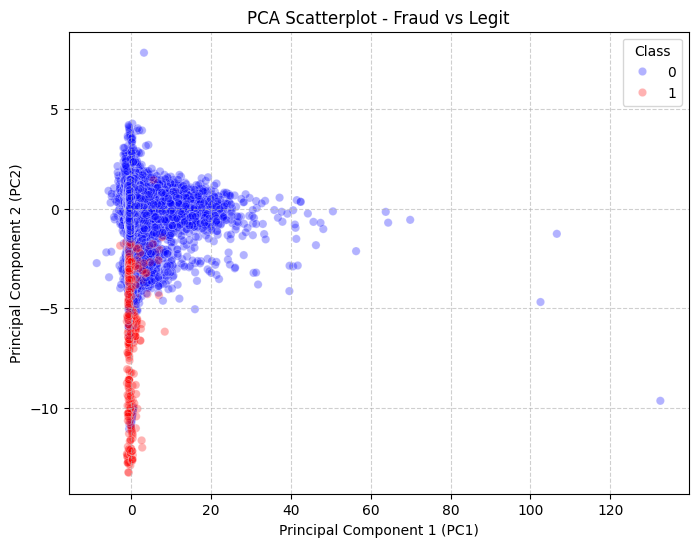

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


def plot_pca_scatter(df):


    features = df.drop(['Class', 'Time'], axis=1) 
    y = df['Class'] 

    
    features_scaled = StandardScaler().fit_transform(features)

    
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(features_scaled)

    
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['Class'] = y.reset_index(drop=True) 

    plt.figure(figsize=(8,6))
   
    sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, alpha=0.3, palette=['blue', 'red'])
    plt.title("PCA Scatterplot - Fraud vs Legit")
    plt.xlabel("Principal Component 1 (PC1)")
    plt.ylabel("Principal Component 2 (PC2)")
    plt.grid(True, linestyle='--', alpha=0.6) # Add a grid for better readability
    plt.show()

try:
    df_creditcard = pd.read_csv(r'C:\Users\HP\Downloads\financial-fraud-detection\creditcard.csv')
    print("DataFrame loaded successfully!")

 
    plot_pca_scatter(df_creditcard)

except FileNotFoundError:
    print("Error: 'creditcard.csv' not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

In [50]:
# STEP 3: PREPROCESSING 
def preprocess_data(df):
    scaler = StandardScaler()
    df['scaled_amount'] = scaler.fit_transform(df[['Amount']])
    df['scaled_time'] = scaler.fit_transform(df[['Time']])
    df = df.drop(['Amount', 'Time'], axis=1)
    return df

In [54]:
# STEP 4: MODELING 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix


def apply_isolation_forest(df):
    # Separate features (X) and target (y)
    X = df.drop('Class', axis=1)
    y = df['Class']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    # Initialize and train the Isolation Forest model
    model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
    model.fit(X_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Convert Isolation Forest's -1 (anomaly) and 1 (inlier) predictions
    # to 1 (fraud) and 0 (legitimate) respectively, to match your y_test.
    y_pred_mapped = np.where(y_pred == -1, 1, 0)

    print("\n Classification Report:")
    print(classification_report(y_test, y_pred_mapped, digits=4))

    print("\n Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_mapped))

    
    anomaly_scores = model.decision_function(X_test)

    
    return X_test, y_test, y_pred_mapped, anomaly_scores


try:
    df_creditcard = pd.read_csv(r'C:\Users\HP\Downloads\financial-fraud-detection\creditcard.csv')
    print("DataFrame loaded successfully!")

 
    X_test_result, y_test_result, y_pred_result, anomaly_scores_result = apply_isolation_forest(df_creditcard)

    print("\n--- Function execution complete ---")
    print(f"Shape of returned X_test_result: {X_test_result.shape}")
    print(f"First 5 elements of y_pred_result: {y_pred_result[:5]}")

except FileNotFoundError:
    print("Error: 'creditcard.csv' not found. Please check the file path.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

DataFrame loaded successfully!

 Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9669    0.9830     56864
           1     0.0422    0.8469    0.0803        98

    accuracy                         0.9666     56962
   macro avg     0.5210    0.9069    0.5317     56962
weighted avg     0.9981    0.9666    0.9815     56962


 Confusion Matrix:
[[54979  1885]
 [   15    83]]

--- Function execution complete ---
Shape of returned X_test_result: (56962, 30)
First 5 elements of y_pred_result: [0 0 1 0 0]


In [65]:
import pandas as pd

# Load the dataset
df = pd.read_csv("creditcard.csv")

# Sample a balanced dataset (optional)
sample_df = df.groupby('Class', group_keys=False).apply(lambda x: x.sample(min(len(x), 5000), random_state=42))

# Export to CSV
sample_df.to_csv("creditcard_cleaned.csv", index=False)
print("✅ creditcard_cleaned.csv")


C:\Users\HP\AppData\Local\Temp\ipykernel_30368\2838282223.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_df = df.groupby('Class', group_keys=False).apply(lambda x: x.sample(min(len(x), 5000), random_state=42))


✅ creditcard_cleaned.csv
